# NASA Bearing dataset

[kaggle](https://www.kaggle.com/vinayak123tyagi/bearing-dataset), [repo](https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/)

4 Rolamentos instalados em um eixo. Amostras de 1s de duração com frequência de amostragem Fs=20kHz, totalizando 20.480 amostras por sequência de coleta. Dividido em 3 datasets:

### Set 1:
- 2.156 exemplos
- 2x acelerômetros uniaxiais [x,y] por rolamento

Description: At the end of the test-to-failure experiment, inner race defect occurred in bearing 3 and roller

### Set 2:
- 948 exemplos
- 1x acelerômetro uniaxial por rolamento

Description: At the end of the test-to-failure experiment, outer race failure occurred in bearing 1.

### Set 3:
- 4.448 exemplos
- 1x acelerômetro uniaxial por rolamento
- Possíveis problemas nos dados

Description: At the end of the test-to-failure experiment, outer race failure occurred in bearing 3.

---

### Possiveis objetivos:
- Detecção de Anomalia
- Predição de Remaining Useful Life (RUL).


In [1]:
import pandas as pd
import numpy as np
import os
import itertools

In [2]:
file_dir = './2nd_test'
file_list = os.listdir(file_dir)

## Feature extraction:

Carregar cada sequência de dados do dataset 2 coletada durante 1s e gerar um dataset com métricas de cada sequência. 

In [3]:
columns_csv = ['Bearing_1','Bearing_2','Bearing_3','Bearing_4']
metric_names = ['mean','std','skew','kurt','rms']
columns_dataset = [col+'_'+met for col,met in itertools.product(columns_csv,metric_names)]

sequence_list = []
for file_ in file_list:
    sequence = pd.read_csv(file_dir+'/'+file_,sep='\t',names=columns_csv)
    
    sequence_mean = np.array(sequence.abs().mean())
    sequence_std = np.array(sequence.std())
    sequence_skew = np.array(sequence.skew())
    sequence_kurt = np.array(sequence.kurtosis())
    sequence_rms = np.sqrt(np.mean(sequence**2))
    
    sequence_cat = np.stack((sequence_mean,sequence_std,sequence_skew,
                            sequence_kurt,sequence_rms),axis=1).reshape(1,20)

    sequence_list.append(sequence_cat.squeeze())


In [4]:
dataset = pd.DataFrame(np.array(sequence_list),columns=columns_dataset)
dataset.index = pd.to_datetime(file_list, format='%Y.%m.%d.%H.%M.%S')
dataset = dataset.sort_index()
dataset.head()

,Bearing_1_mean,Bearing_1_std,Bearing_1_skew,Bearing_1_kurt,Bearing_1_rms,Bearing_2_mean,Bearing_2_std,Bearing_2_skew,Bearing_2_kurt,Bearing_2_rms,Bearing_3_mean,Bearing_3_std,Bearing_3_skew,Bearing_3_kurt,Bearing_3_rms,Bearing_4_mean,Bearing_4_std,Bearing_4_skew,Bearing_4_kurt,Bearing_4_rms
2004-02-12 10:32:39,0.058332,0.073477,0.084000,0.629209,0.074179,0.071832,0.090056,0.126924,0.507217,0.090944,0.083244,0.108436,0.204855,3.214152,0.109404,0.043065,0.053168,-0.022082,0.066268,0.054103
2004-02-12 10:42:39,0.058997,0.075340,0.052146,0.648742,0.075382,0.074008,0.093386,0.070094,0.253369,0.093419,0.084439,0.109792,-0.023855,1.395884,0.109817,0.044540,0.055974,0.001583,0.107859,0.056101
2004-02-12 10:52:39,0.060239,0.076191,0.032810,0.513894,0.076230,0.074223,0.093705,0.096590,0.311158,0.093718,0.083922,0.109852,0.056565,2.640886,0.109861,0.044442,0.056038,0.070454,0.257592,0.056145
2004-02-12 11:02:39,0.061453,0.078693,0.041489,1.158529,0.078724,0.073843,0.092919,0.105842,0.235691,0.092947,0.084462,0.110624,0.033553,2.683727,0.110667,0.045081,0.056686,-0.036330,0.806680,0.056807
2004-02-12 11:12:39,0.061361,0.078439,0.028226,0.603617,0.078474,0.075606,0.095338,0.097973,0.226657,0.095348,0.082837,0.107502,-0.002892,1.579073,0.107506,0.045118,0.056778,0.019009,0.139281,0.056841


[Text(0.5, 0, 'Datetime'), Text(0, 0.5, 'Acceleration (RMS)')]

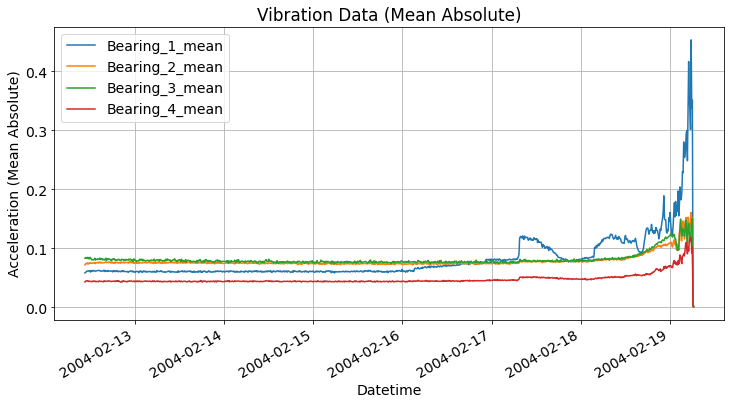

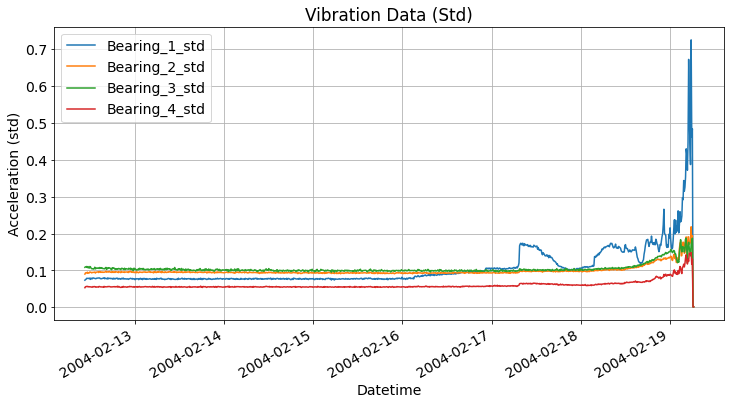

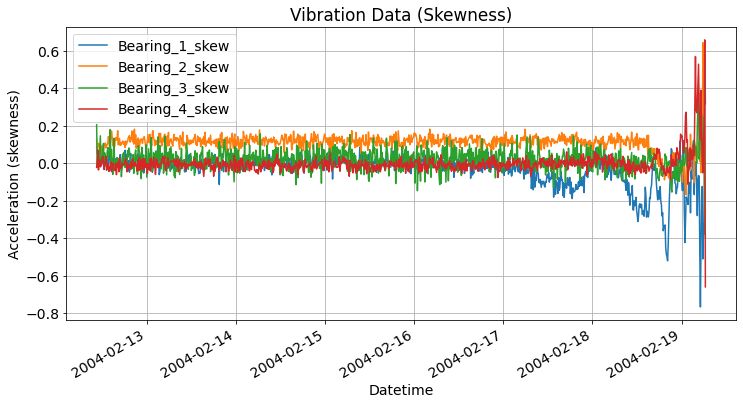

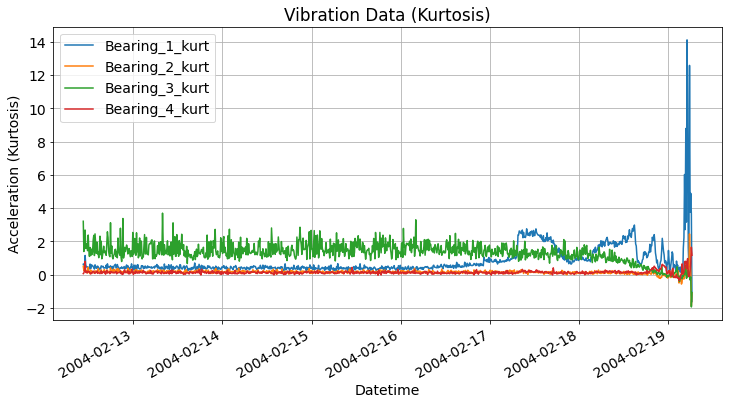

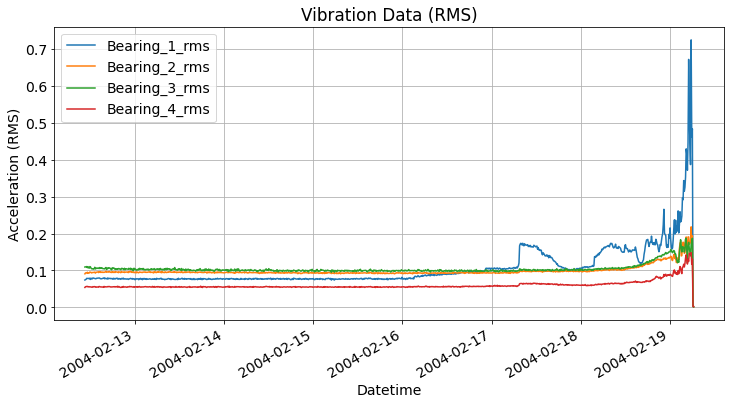

In [5]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
rcParams.update({'font.size': 14})

ax1 = dataset.loc[:,dataset.columns.str.contains('mean')].plot(figsize = (12,6), grid=True, title="Vibration Data (Mean Absolute)")
ax1.set(xlabel="Datetime", ylabel="Acceleration (Mean Absolute)")

ax2 = dataset.loc[:,dataset.columns.str.contains('std')].plot(figsize = (12,6), grid=True, title="Vibration Data (Std)")
ax2.set(xlabel="Datetime", ylabel="Acceleration (std)")

ax3 = dataset.loc[:,dataset.columns.str.contains('skew')].plot(figsize = (12,6), grid=True, title="Vibration Data (Skewness)")
ax3.set(xlabel="Datetime", ylabel="Acceleration (skewness)")

ax4 = dataset.loc[:,dataset.columns.str.contains('kurt')].plot(figsize = (12,6), grid=True, title="Vibration Data (Kurtosis)")
ax4.set(xlabel="Datetime", ylabel="Acceleration (Kurtosis)")

ax5 = dataset.loc[:,dataset.columns.str.contains('rms')].plot(figsize = (12,6), grid=True, title="Vibration Data (RMS)")
ax5.set(xlabel="Datetime", ylabel="Acceleration (RMS)")

O Rolamento 1 começa a apresentar oscilações no comportamento aprox. a partir da sequência número 650:

[Text(0.5, 0, 'Datetime'), Text(0, 0.5, 'Acceleration (mean)')]

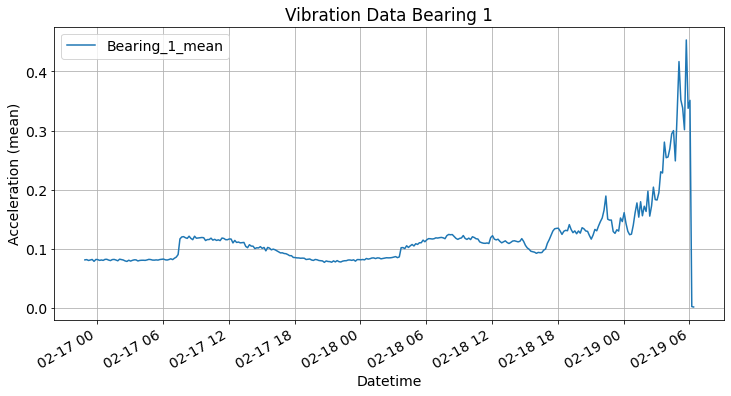

In [6]:
ax = dataset[['Bearing_1_mean']][650:].plot(figsize = (12,6), grid=True, title="Vibration Data Bearing 1")
ax.set(xlabel="Datetime", ylabel="Acceleration (mean)")

In [7]:
# from sklearn.preprocessing import StandardScaler
# import copy

# scaler = StandardScaler()
# dataset_scaled = copy.deepcopy(dataset)
# dataset_scaled[dataset_scaled.columns] = scaler.fit_transform(dataset_scaled[dataset_scaled.columns])

Computar métricas móveis ao longo das diferentes sequências, utilizando janela de 40 minutos (4 sequências):

In [8]:
def rms(rolling_input):
    return np.sqrt(np.mean(rolling_input**2))

rolling_window = '40T' # define window size of 40 minutes

dataset_rolling = pd.DataFrame()
for bearing in columns_csv:
    dataset_rolling['%s_%s_mean' % (bearing,rolling_window)] = dataset['%s_mean' % (bearing)].rolling(rolling_window).mean().fillna(0)
    dataset_rolling['%s_%s_std' % (bearing,rolling_window)] = dataset['%s_mean' % (bearing)].rolling(rolling_window).std().fillna(0)
    dataset_rolling['%s_%s_skew' % (bearing,rolling_window)] = dataset['%s_mean' % (bearing)].rolling(rolling_window).skew().fillna(0)
    dataset_rolling['%s_%s_kurt' % (bearing,rolling_window)] = dataset['%s_mean' % (bearing)].rolling(rolling_window).kurt().fillna(0)
    dataset_rolling['%s_%s_rms' % (bearing,rolling_window)] = dataset['%s_mean' % (bearing)].rolling(rolling_window).apply(rms).fillna(0)

[Text(0.5, 0, 'Datetime'), Text(0, 0.5, 'Acceleration (RMS)')]

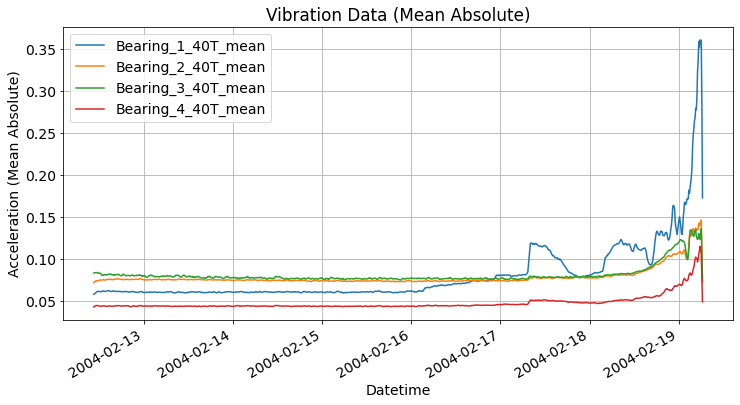

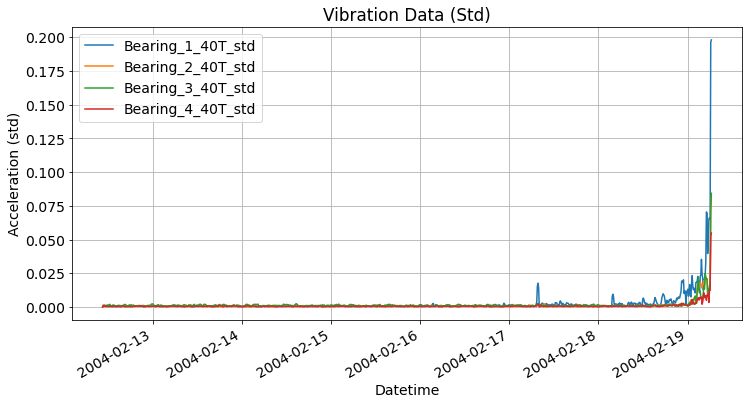

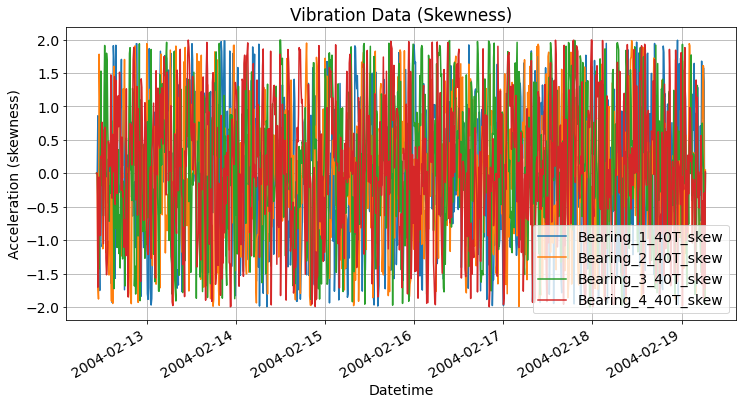

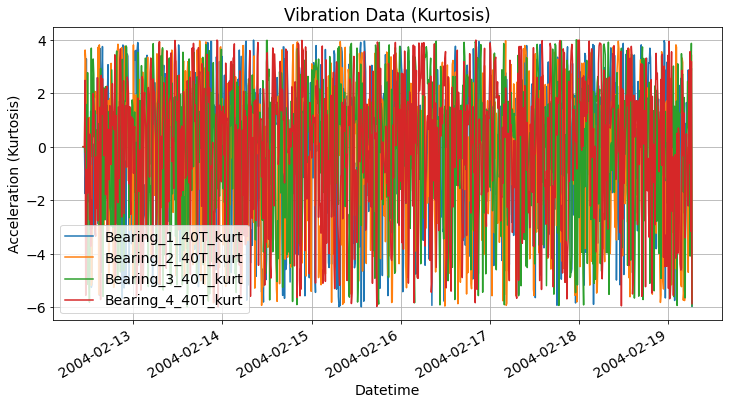

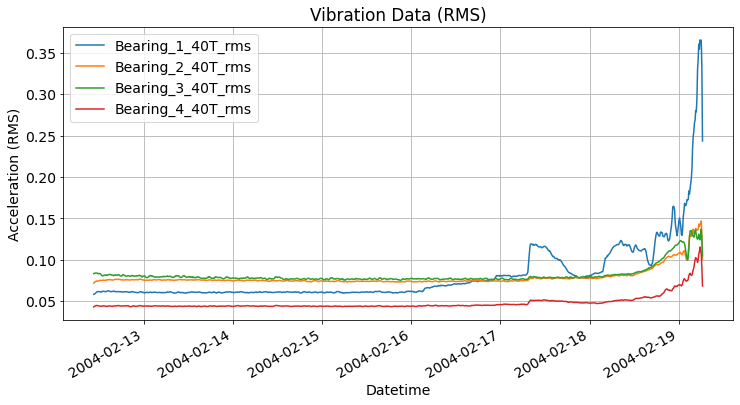

In [9]:
ax1 = dataset_rolling.loc[:,dataset_rolling.columns.str.contains('mean')].plot(figsize = (12,6), grid=True, title="Vibration Data (Mean Absolute)")
ax1.set(xlabel="Datetime", ylabel="Acceleration (Mean Absolute)")

ax2 = dataset_rolling.loc[:,dataset_rolling.columns.str.contains('std')].plot(figsize = (12,6), grid=True, title="Vibration Data (Std)")
ax2.set(xlabel="Datetime", ylabel="Acceleration (std)")

ax3 = dataset_rolling.loc[:,dataset_rolling.columns.str.contains('skew')].plot(figsize = (12,6), grid=True, title="Vibration Data (Skewness)")
ax3.set(xlabel="Datetime", ylabel="Acceleration (skewness)")

ax4 = dataset_rolling.loc[:,dataset_rolling.columns.str.contains('kurt')].plot(figsize = (12,6), grid=True, title="Vibration Data (Kurtosis)")
ax4.set(xlabel="Datetime", ylabel="Acceleration (Kurtosis)")

ax5 = dataset_rolling.loc[:,dataset_rolling.columns.str.contains('rms')].plot(figsize = (12,6), grid=True, title="Vibration Data (RMS)")
ax5.set(xlabel="Datetime", ylabel="Acceleration (RMS)")

Utiliza-se apenas "mean", "std" como features, já que "skew" e "kurt" passam a apresentar comportamento ruidoso e "rms" não apresenta diferenças significativas para "mean":

In [10]:
dataset = dataset.join(dataset_rolling.loc[:,dataset_rolling.columns.str.contains('mean')])
dataset = dataset.join(dataset_rolling.loc[:,dataset_rolling.columns.str.contains('std')])
dataset.head()

,Bearing_1_mean,Bearing_1_std,Bearing_1_skew,Bearing_1_kurt,Bearing_1_rms,Bearing_2_mean,Bearing_2_std,Bearing_2_skew,Bearing_2_kurt,Bearing_2_rms,...,Bearing_4_kurt,Bearing_4_rms,Bearing_1_40T_mean,Bearing_2_40T_mean,Bearing_3_40T_mean,Bearing_4_40T_mean,Bearing_1_40T_std,Bearing_2_40T_std,Bearing_3_40T_std,Bearing_4_40T_std
2004-02-12 10:32:39,0.058332,0.073477,0.084000,0.629209,0.074179,0.071832,0.090056,0.126924,0.507217,0.090944,...,0.066268,0.054103,0.058332,0.071832,0.083244,0.043065,0.000000,0.000000,0.000000,0.000000
2004-02-12 10:42:39,0.058997,0.075340,0.052146,0.648742,0.075382,0.074008,0.093386,0.070094,0.253369,0.093419,...,0.107859,0.056101,0.058665,0.072920,0.083842,0.043802,0.000470,0.001539,0.000845,0.001043
2004-02-12 10:52:39,0.060239,0.076191,0.032810,0.513894,0.076230,0.074223,0.093705,0.096590,0.311158,0.093718,...,0.257592,0.056145,0.059189,0.073354,0.083868,0.044016,0.000968,0.001323,0.000599,0.000825
2004-02-12 11:02:39,0.061453,0.078693,0.041489,1.158529,0.078724,0.073843,0.092919,0.105842,0.235691,0.092947,...,0.806680,0.056807,0.059755,0.073477,0.084017,0.044282,0.001380,0.001108,0.000572,0.000859
2004-02-12 11:12:39,0.061361,0.078439,0.028226,0.603617,0.078474,0.075606,0.095338,0.097973,0.226657,0.095348,...,0.139281,0.056841,0.060512,0.074420,0.083915,0.044795,0.001151,0.000806,0.000761,0.000354


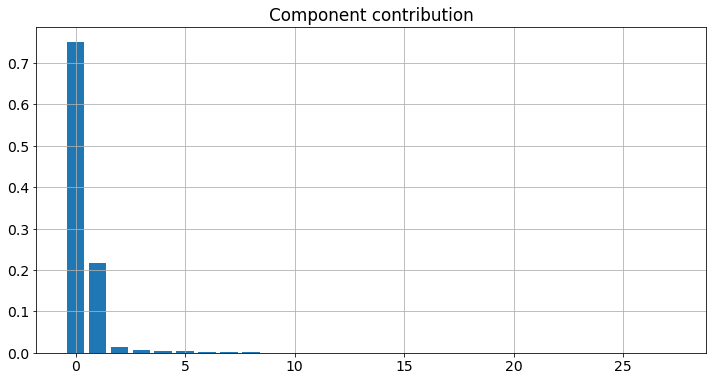

In [11]:
from sklearn.decomposition import PCA

pca_all = PCA()
pca_viz = pca_all.fit_transform(dataset) 
fig = plt.figure(figsize=(12, 6))

ax = plt.bar(range(len(pca_all.explained_variance_ratio_)),pca_all.explained_variance_ratio_)
plt.title("Component contribution")
plt.grid(True)

## K-means Clustering:

In [12]:
pca = PCA(n_components=2)

training_set = pd.concat([normal_dataset[:int(split*len(normal_dataset))],anomaly_dataset[:int(split*len(anomaly_dataset))]])

test_set = pd.concat([normal_dataset[int(split*len(normal_dataset)):],anomaly_dataset[int(split*len(anomaly_dataset)):]])

pca_data = pca.fit_transform(dataset)

fig, (ax,ax2) = plt.subplots(2,figsize=(12, 10))
ax.scatter(pca_data[:,0],pca_data[:,1],s=80)
ax.set_title('PCA=2')
ax.grid()
ax = plt.scatter(pca_data[:700,0],pca_data[:700,1],s=80,alpha=0.6,label='sequence < 650')
ax2.scatter(pca_data[700:,0],pca_data[700:,1],s=80,alpha=0.6,label='sequence > 650')
ax2.grid()
ax2.legend()
ax2.set_title('PCA=2 Split by time')

NameError: name 'normal_dataset' is not defined

### K-means prediction with random splits:

Resultados decentes podem ser obtidos, mas dependem muito da inicialização. Testar ensemble.

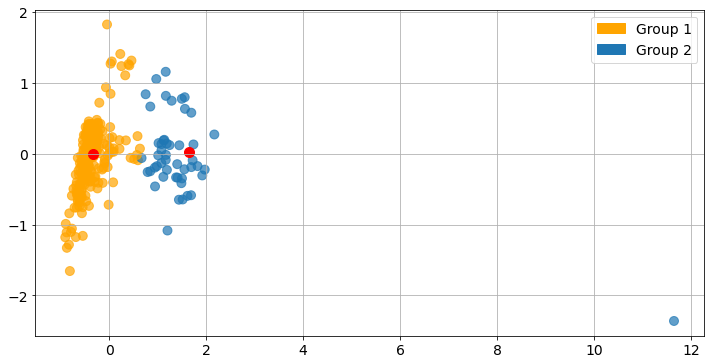

In [181]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches
orange_patch = mpatches.Patch(color='orange', label='Group 1')
blue_patch = mpatches.Patch(color='tab:blue', label='Group 2')

split = 0.7

dataset_ind = dataset.reset_index()
dataset_ind = dataset_ind.iloc[:,1:]
dataset_ind.index = np.arange(len(dataset_ind))

X_train, X_test = train_test_split(dataset_ind, test_size=1-split, random_state=42)

# Apply PCA
pca = PCA(n_components=2)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

kmeans = KMeans(n_clusters=2, random_state=0,algorithm='full').fit(pca_train)

centers = kmeans.cluster_centers_
pred = kmeans.predict(pca_test)

fig = plt.figure(figsize=(12, 6))
ax = plt.scatter(pca_test[:,0],pca_test[:,1],c=['orange' if item == 1 else 'tab:blue' for item in pred], alpha=0.7,s=80)
ax = plt.scatter(centers[:,0],centers[:,1],c='r',s=100)
plt.legend(handles=[orange_patch,blue_patch])
plt.grid()


Acc: 0.6452702702702703| F1: 0.7712418300653595 | Precision: 0.7165991902834008


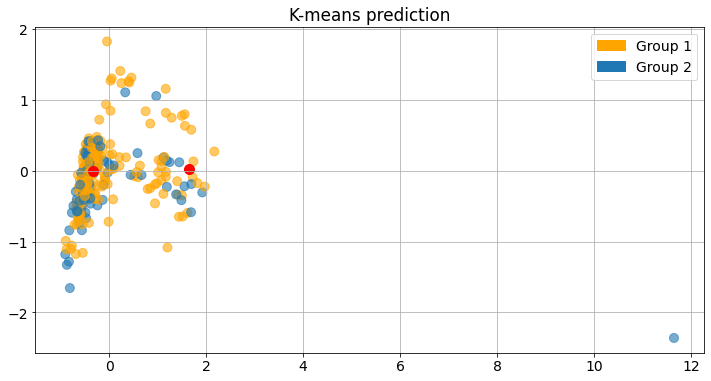

In [182]:
from sklearn.metrics import f1_score,accuracy_score,precision_score

n_normal = X_test.index[X_test.index < 650]
n_anomaly = X_test.index[X_test.index > 650]

true_labels = [0 if index in n_normal else 1 for index in range(len(n_normal)+len(n_anomaly))]

acc = accuracy_score(true_labels,pred)
f1_score = f1_score(true_labels,pred)
precision = precision_score(true_labels,pred)
print("Acc: {}| F1: {} | Precision: {}".format(acc,f1_score,precision))

fig = plt.figure(figsize=(12, 6))
ax = plt.scatter(pca_test[:,0],pca_test[:,1],c=['orange' if item == 1 else 'tab:blue' for item in true_labels], alpha=0.6,s=80)
ax = plt.scatter(centers[:,0],centers[:,1],c='r',s=100)
plt.title('K-means prediction')
plt.legend(handles=[orange_patch,blue_patch])
plt.grid()



### K-Means prediction with ad-hoc split:

In [189]:
# Split dataset stratifying anomaly and normal data, using anomaly as sequence>650.
normal_dataset = dataset[:650]
anomaly_dataset = dataset[650:]
split = 0.7

# Get normal and anomaly examples for each set
normal_training_idx = normal_dataset[:int(split*len(normal_dataset))]
normal_test_idx = normal_dataset[int(split*len(normal_dataset)):]

anomaly_training_idx = anomaly_dataset[:int(split*len(anomaly_dataset))]
anomaly_test_idx = anomaly_dataset[int(split*len(anomaly_dataset)):]

# Join normal and anomaly examples into each set
training_set = pd.concat([normal_training_idx,anomaly_training_idx])
training_labels = [0]*len(normal_training_idx) + [1]*len(anomaly_training_idx)

test_set = pd.concat([normal_test_idx,anomaly_test_idx])
test_labels = [0]*len(normal_test_idx) + [1]*len(anomaly_test_idx)

# Apply PCA
pca = PCA(n_components=2)
pca_train = pca.fit_transform(training_set)
pca_test = pca.transform(test_set)


In [190]:
n_normal = dataset_ind[dataset_ind.index < 650]
n_anomaly = dataset_ind[dataset_ind.index > 650]

n_normal

,Bearing_1_mean,Bearing_1_std,Bearing_1_skew,Bearing_1_kurt,Bearing_1_rms,Bearing_2_mean,Bearing_2_std,Bearing_2_skew,Bearing_2_kurt,Bearing_2_rms,...,Bearing_4_kurt,Bearing_4_rms,Bearing_1_40T_mean,Bearing_2_40T_mean,Bearing_3_40T_mean,Bearing_4_40T_mean,Bearing_1_40T_std,Bearing_2_40T_std,Bearing_3_40T_std,Bearing_4_40T_std
0,0.058332,0.073477,0.084000,0.629209,0.074179,0.071832,0.090056,0.126924,0.507217,0.090944,...,0.066268,0.054103,0.058332,0.071832,0.083244,0.043065,0.000000,0.000000,0.000000,0.000000
1,0.058997,0.075340,0.052146,0.648742,0.075382,0.074008,0.093386,0.070094,0.253369,0.093419,...,0.107859,0.056101,0.058665,0.072920,0.083842,0.043802,0.000470,0.001539,0.000845,0.001043
2,0.060239,0.076191,0.032810,0.513894,0.076230,0.074223,0.093705,0.096590,0.311158,0.093718,...,0.257592,0.056145,0.059189,0.073354,0.083868,0.044016,0.000968,0.001323,0.000599,0.000825
3,0.061453,0.078693,0.041489,1.158529,0.078724,0.073843,0.092919,0.105842,0.235691,0.092947,...,0.806680,0.056807,0.059755,0.073477,0.084017,0.044282,0.001380,0.001108,0.000572,0.000859
4,0.061361,0.078439,0.028226,0.603617,0.078474,0.075606,0.095338,0.097973,0.226657,0.095348,...,0.139281,0.056841,0.060512,0.074420,0.083915,0.044795,0.001151,0.000806,0.000761,0.000354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,0.075299,0.097262,-0.036250,0.572917,0.097273,0.074694,0.093715,0.086536,0.100086,0.093721,...,0.149953,0.056849,0.075799,0.074585,0.075983,0.045062,0.000464,0.000498,0.000469,0.000246
646,0.076308,0.098379,-0.027036,0.540745,0.098386,0.074435,0.093444,0.143396,0.131181,0.093456,...,0.132663,0.056536,0.075771,0.074438,0.076464,0.044991,0.000415,0.000404,0.000854,0.000160
647,0.078939,0.103772,0.022244,1.058529,0.103794,0.074512,0.093493,0.102291,0.211418,0.093514,...,0.104474,0.056831,0.076560,0.074599,0.077220,0.045045,0.001639,0.000150,0.001039,0.000189
648,0.081472,0.106377,-0.058155,0.859887,0.106386,0.073661,0.092691,0.130445,0.160858,0.092691,...,0.134427,0.057941,0.078004,0.074326,0.077189,0.045344,0.002775,0.000456,0.001074,0.000419


Text(0.5, 1.0, 'Test set PCA=2')

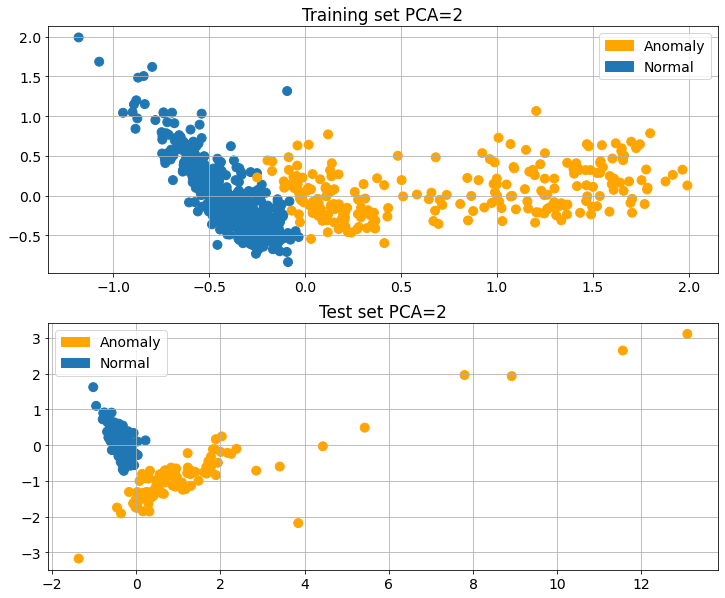

In [191]:
import matplotlib.patches as mpatches
orange_patch = mpatches.Patch(color='orange', label='Anomaly')
blue_patch = mpatches.Patch(color='tab:blue', label='Normal')

fig, (ax,ax2) = plt.subplots(2,figsize=(12, 10))

ax.scatter(pca_train[:,0],pca_train[:,1],s=80,c=['orange' if item == 1 else 'tab:blue' for item in training_labels])
ax.set_title('Training set PCA=2')
ax.legend(handles=[orange_patch,blue_patch])
ax.grid()

ax2.scatter(pca_test[:,0],pca_test[:,1],s=80,c=['orange' if item == 1 else 'tab:blue' for item in test_labels])

ax2.legend(handles=[orange_patch,blue_patch])
ax2.grid()
ax2.set_title('Test set PCA=2')

Acc: 0.8417508417508417| F1: 0.7267441860465116 | Precision: 0.8065843621399177


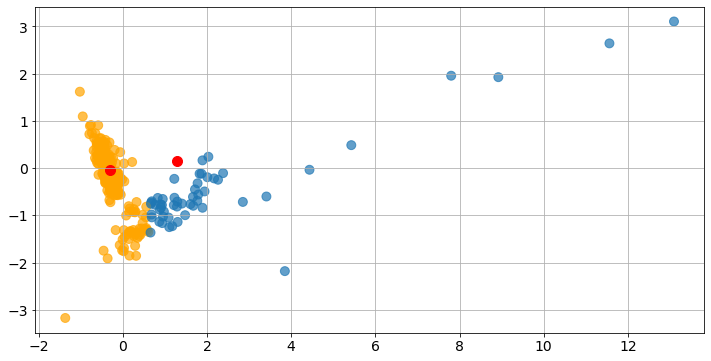

In [192]:
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score,accuracy_score,precision_score

kmeans_adhoc = KMeans(n_clusters=2, random_state=0, algorithm='full').fit(pca_train)

centers = kmeans_adhoc.cluster_centers_
pred = kmeans_adhoc.predict(pca_test)

# Evaluate results. Results can be inverted if k-means predicted inverted labels
acc = 1-accuracy_score(test_labels,pred)
f1_score = 1-f1_score(test_labels,pred)
precision = 1-precision_score(test_labels,pred)
print("Acc: {}| F1: {} | Precision: {}".format(acc,f1_score,precision))

fig = plt.figure(figsize=(12,6))
ax = plt.scatter(pca_test[:,0],pca_test[:,1],c=['orange' if item == 1 else 'tab:blue' for item in pred], alpha=0.7,s=80)
ax = plt.scatter(centers[:,0],centers[:,1],c='r',s=100)
plt.grid()

In [ ]:
from sklearn.ensemble import IsolationForest

X_train, X_test = train_test_split(dataset_ind, test_size=1-split, random_state=42)

# Apply PCA
pca = PCA(n_components=2)
pca_train = pca.fit_transform(X_train.iloc[:,1:])
pca_test = pca.transform(X_test.iloc[:,1:])
